In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
#data clean up 
data = pd.read_csv('Life Expectancy Data.csv')
data.columns = data.columns.str.strip().str.lower().str.replace(" ", '_')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [4]:
features = ['adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 
            'hepatitis_b', 'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria', 
            'hiv/aids', 'gdp', 'population', 'thinness__1-19_years', 'thinness_5-9_years',  
            'income_composition_of_resources', 'schooling']

correlation_data = pd.DataFrame(columns=['Feature', 'Correlation', 'p-value'])

for feat in features: 
    new_data = data[[feat, 'life_expectancy']].copy()
    new_data.dropna(inplace=True)
    x = new_data[feat]
    y = new_data['life_expectancy']
    corr, pvalue = stats.pearsonr(x, y)
    correlation_data = correlation_data.append({'Feature' : feat, 'Correlation' : round(corr, 2), 'p-value' : pvalue}, ignore_index = True)

/var/folders/_4/8svth1150j92g_xf_9rmf60r0000gn/T/ipykernel_39312/2998220953.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({'Feature' : feat, 'Correlation' : round(corr, 2), 'p-value' : pvalue}, ignore_index = True)
/var/folders/_4/8svth1150j92g_xf_9rmf60r0000gn/T/ipykernel_39312/2998220953.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({'Feature' : feat, 'Correlation' : round(corr, 2), 'p-value' : pvalue}, ignore_index = True)
/var/folders/_4/8svth1150j92g_xf_9rmf60r0000gn/T/ipykernel_39312/2998220953.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({'Feature' : feat, 'Correlation

In [5]:
correlation_data.sort_values(by='Correlation', key=abs)


,Feature,Correlation,p-value
12,population,-0.02,3.035322e-01
5,measles,-0.16,9.727313e-18
1,infant_deaths,-0.20,6.877600e-27
8,total_expenditure,0.22,1.880174e-30
4,hepatitis_b,0.26,4.562150e-37
3,percentage_expenditure,0.38,2.773065e-102
2,alcohol,0.40,2.105875e-108
11,gdp,0.46,2.708674e-131
7,polio,0.47,1.959686e-156
14,thinness_5-9_years,-0.47,2.682649e-160


From above, we can see the three features with the highest correlation value is adult morality, income composition of resources, and schooling. I will compute the linear regression line for each of these features along with their the linear regression test to determine if they are statitically significant, and I will also compute the confidence interval. 
- Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Number of years of Schooling(years)

In [6]:
# values for schooling 
school_life = data[['schooling', 'life_expectancy']]
school_life = school_life.dropna()

X_school_reg = school_life['schooling'].dropna().to_numpy() #independent variable
X_school_reg = X_school_reg.reshape(-1, 1)

y_school_reg = school_life['life_expectancy'].dropna().to_numpy()  #dependent variable
y_school_reg = y_school_reg.reshape(-1, 1)

school_res = stats.linregress(X_school_reg[:,0], y_school_reg[:,0])

#display the parameters for the slope and intercept
print('The intercept is: ', school_res.intercept)
print('The slope is: ', school_res.slope)
print(f"R-squared: {school_res.rvalue**2:.6f}")
print(f'The line of best fit is y = {school_res.intercept:.2f} + {school_res.slope:.2f}x, where x is the years of schooling and y is life expectacny.')
print(f"The p-value for the linear regression t-test is {pvalue}.")

The intercept is:  44.10888913291283
The slope is:  2.1034531049254044
R-squared: 0.565467
The line of best fit is y = 44.11 + 2.10x, where x is the years of schooling and y is life expectacny.
The p-value for the linear regression t-test is 0.0.


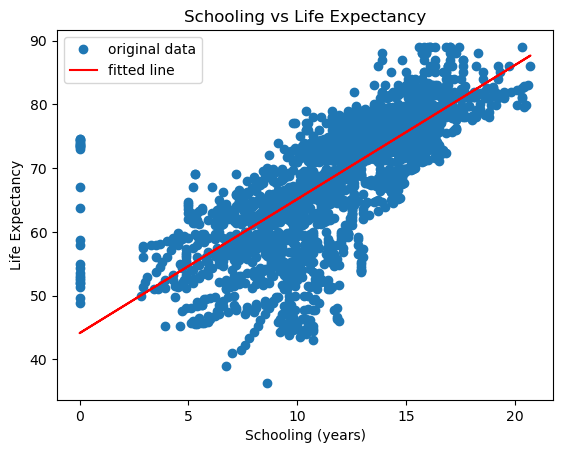

In [7]:
plt.plot(X_school_reg, y_school_reg, 'o', label='original data')
plt.plot(x, school_res.intercept + school_res.slope*x, 'r', label='fitted line')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy')
plt.title("Schooling vs Life Expectancy")
plt.legend()
plt.show()

In [8]:
# values for adult morality 
adult_mortality = data[['adult_mortality', 'life_expectancy']]
adult_mortality = adult_mortality.dropna()

X_mor_reg = adult_mortality['adult_mortality'].dropna().to_numpy() #independent variable
X_mor_reg = X_mor_reg.reshape(-1, 1)

y_mor_reg = adult_mortality['life_expectancy'].dropna().to_numpy()  #dependent variable
y_mor_reg = y_mor_reg.reshape(-1, 1)

mortality_res = stats.linregress(X_mor_reg[:,0], y_mor_reg[:,0])

#display the parameters for the slope and intercept
print('The intercept is: ', mortality_res.intercept)
print('The slope is: ', mortality_res.slope)
print(f"R-squared: {mortality_res.rvalue**2:.6f}")
print(f'The line of best fit is y = {mortality_res.intercept:.2f} + {mortality_res.slope:.2f}x, where x is the probablity of an adult dying and y is life expectancy.')
print(f"The p-value for the linear regression t-test is {pvalue}.")

The intercept is:  78.01821624804695
The slope is:  -0.05335845921504725
R-squared: 0.484916
The line of best fit is y = 78.02 + -0.05x, where x is the probablity of an adult dying and y is life expectancy.
The p-value for the linear regression t-test is 0.0.


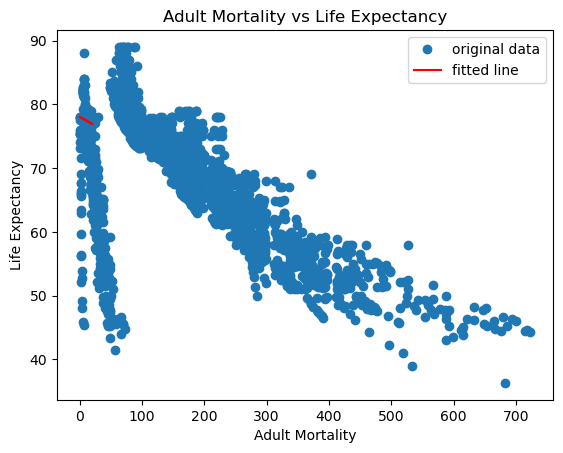

In [12]:
plt.plot(X_mor_reg, y_mor_reg, 'o', label='original data')
plt.plot(x, mortality_res.intercept + mortality_res.slope*x, 'r', label='fitted line')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.title("Adult Mortality vs Life Expectancy")
plt.legend()
plt.show()